In [18]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt

In [2]:
# Specify the file path to your CSV file
file_path = 'Spotify_Dataset_V3.csv'

# Use the pandas read_csv function with the ';' delimiter
df = pd.read_csv(file_path, delimiter=';')

df

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
1          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
4          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
...      ...                            ...                         ...   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   
651935   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
1       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
2       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
3       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
4       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
...            ...           ...     ...       ...          ...           ...   
651931  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
651932  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
651933  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
651934  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   
651935  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence # of Artist   Artist (Ind.)  \
0                  0.000    0.834    Artist 1  Eslabon Armado   
1                  0.000    0.834    Artist 2      Peso Pluma   
2                  0.629    0.234    Artist 1       Bad Bunny   
3                  0.000    0.559    Artist 1       Yng Lvcas   
4                  0.000    0.559    Artist 2      Peso Pluma   
...                  ...      ...         ...             ...   
651931             0.000    0.377    Artist 1       MiC LOWRY   
651932             0.004    0.883    Artist 1   Stevie Wonder   
651933             0.000    0.764    Artist 1      The Weeknd   
651934             0.000    0.684    Artist 1           JAY-Z   
651935             0.000    0.684    Artist 2      Kanye West   

       # of Nationality     Nationality      Continent  Points (Total)  \
0         Nationality 1          Mexico  Latin-America             200   
1         Nationality 2          Mexico  Latin-America             200   
2         Nationality 1     Puerto Rico  Latin-America             199   
3         Nationality 1          Mexico  Latin-America             198   
4         Nationality 2          Mexico  Latin-America             198   
...                 ...             ...            ...             ...   
651931    Nationality 1  United Kingdom         Europe               4   
651932    Nationality 1   United States  Anglo-America               3   
651933    Nationality 1          Canada  Anglo-America               2   
651934    Nationality 1   United States  Anglo-America               1   
651935    Nationality 2   United States  Anglo-America               1   

        Points (Ind for each Artist/Nat)                      id  \
0                                  100.0  3qQbCzHBycnDpGskqOWY0E   
1                                  100.0  3qQbCzHBycnDpGskqOWY0E   
2                                  199.0  7ro0hRteUMfnOioTFI5TG1   
3                                   99.0  2UW7JaomAMuX9pZrjVpHAU   
4                                   99.0  2UW7JaomAMuX9pZrjVpHAU   
...                                  ...                

In [3]:
# df with one entry per song, not split up per artists
df_one_song = df.copy()
df_one_song.drop_duplicates(subset=['Date', 'id'], keep='first', inplace=True)

In [4]:
df_one_song['min_rank'] = df_one_song.groupby('Title')['Rank'].transform('min')
#df['min_rank'] = df.groupby('title')['rank'].transform('min')

In [5]:
df_one_song

Rank                          Title                     Artists  \
0          1                Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2                 WHERE SHE GOES                   Bad Bunny   
3          3                La Bebe - Remix       Yng Lvcas, Peso Pluma   
5          4              Cupid - Twin Ver.                 FIFTY FIFTY   
6          5                      un x100to   Grupo Frontera, Bad Bunny   
...      ...                            ...                         ...   
651930   196                  White Iverson                 Post Malone   
651931   197                        Oh Lord                   MiC LOWRY   
651932   198  Superstition - Single Version               Stevie Wonder   
651933   199                        Secrets                  The Weeknd   
651934   200                Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0       29/05/2023         0.668   0.758   -5176.0        0.033         0.483   
2       29/05/2023         0.652   0.800   -4019.0        0.061         0.143   
3       29/05/2023         0.812   0.479   -5678.0        0.333         0.213   
5       29/05/2023         0.783   0.592   -8332.0        0.033         0.435   
6       29/05/2023         0.569   0.724   -4076.0        0.047         0.228   
...            ...           ...     ...       ...          ...           ...   
651930  01/01/2017         0.675   0.562   -7678.0        0.035         0.233   
651931  01/01/2017         0.273   0.794   -6644.0        0.068         0.022   
651932  01/01/2017         0.650   0.658  -10908.0        0.085         0.089   
651933  01/01/2017         0.665   0.771   -5779.0        0.053         0.016   
651934  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  ...  # of Artist   Artist (Ind.) # of Nationality  \
0                  0.000  ...     Artist 1  Eslabon Armado    Nationality 1   
2                  0.629  ...     Artist 1       Bad Bunny    Nationality 1   
3                  0.000  ...     Artist 1       Yng Lvcas    Nationality 1   
5                  0.000  ...     Artist 1     FIFTY FIFTY    Nationality 1   
6                  0.000  ...     Artist 1  Grupo Frontera    Nationality 1   
...                  ...  ...          ...             ...              ...   
651930             0.000  ...     Artist 1     Post Malone    Nationality 1   
651931             0.000  ...     Artist 1       MiC LOWRY    Nationality 1   
651932             0.004  ...     Artist 1   Stevie Wonder    Nationality 1   
651933             0.000  ...     Artist 1      The Weeknd    Nationality 1   
651934             0.000  ...     Artist 1           JAY-Z    Nationality 1   

           Nationality      Continent Points (Total)  \
0               Mexico  Latin-America            200   
2          Puerto Rico  Latin-America            199   
3               Mexico  Latin-America            198   
5          South Korea           Asia            197   
6               Mexico  Latin-America            196   
...                ...            ...            ...   
651930   United States  Anglo-America              5   
651931  United Kingdom         Europe              4   
651932   United States  Anglo-America              3   
651933          Canada  Anglo-America              2   
651934   United States  Anglo-America              1   

        Points (Ind for each Artist/Nat)                      id  \
0                                  100.0  3qQbCzHBycnDpGskqOWY0E   
2                                  199.0  7ro0hRteUMfnOioTFI5TG1   
3                                   99.0  2UW7JaomAMuX9pZrjVpHAU   
5                                  197.0  7FbrGaHYVDmfr7KoLIZnQ7   
6                                   98.0  6pD0ufEQq0xdHSsRbg9LBK   
...                                  ...                     ...   
651930                              

In [6]:
# add a measure for the overall popularity of the song: mean of the points obtained
df_one_song['Title_Count'] = df_one_song.groupby('Title')['Title'].transform('count')

df_one_song['Mean_Points'] = df_one_song.groupby('Title')['Points (Total)'].transform('mean')

result_df = df_one_song.drop_duplicates(subset='Title', keep='first')

#result_df = first_instance_df.merge(mean_rank_per_title, on='Title', suffixes=('', '_mean'))

In [7]:
result_df.tail(100)

Rank                                Title                     Artists  \
639524   195                               Scrape                      Future   
639527   166                        Setting Fires      The Chainsmokers, XYLØ   
639748   194                    Never Be Like You                  Flume, kai   
639765   180                               Outlet                   Desiigner   
639805   200                            Sidewalks  The Weeknd, Kendrick Lamar   
...      ...                                  ...                         ...   
651918   184                                 Bobo                    J Balvin   
651919   185              Stay (feat. Maty Noyes)                        Kygo   
651921   187  Purple Lamborghini (with Rick Ross)                    Skrillex   
651926   192                         Paper Planes                      M.I.A.   
651934   200                      Ni**as In Paris           JAY-Z, Kanye West   

              Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
639524  17/02/2017         0.928   0.496   -8385.0        0.154         0.133   
639527  17/02/2017         0.626   0.717   -5751.0        0.038         0.017   
639748  16/02/2017         0.494   0.559   -5445.0        0.057         0.436   
639765  16/02/2017         0.650   0.801   -2178.0        0.069         0.117   
639805  16/02/2017         0.542   0.720   -5136.0        0.063         0.147   
...            ...           ...     ...       ...          ...           ...   
651918  01/01/2017         0.729   0.888   -2864.0        0.122         0.117   
651919  01/01/2017         0.648   0.736   -7948.0        0.039         0.044   
651921  01/01/2017         0.457   0.899   -2591.0        0.132         0.002   
651926  01/01/2017         0.447   0.848   -6175.0        0.222         0.033   
651934  01/01/2017         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  ...  # of Nationality     Nationality  \
639524               0.0  ...     Nationality 1   United States   
639527               0.0  ...     Nationality 1   United States   
639748               0.0  ...     Nationality 1       Australia   
639765               0.0  ...     Nationality 1   United States   
639805               0.0  ...     Nationality 1          Canada   
...                  ...  ...               ...             ...   
651918               0.0  ...     Nationality 1        Colombia   
651919               0.0  ...     Nationality 1          Norway   
651921               0.0  ...     Nationality 1   United States   
651926               0.0  ...     Nationality 1  United Kingdom   
651934               0.0  ...     Nationality 1   United States   

            Continent Points (Total) Points (Ind for each Artist/Nat)  \
639524  Anglo-America              6                              6.0   
639527  Anglo-America             35                             18.0   
639748        Oceania              7                              4.0   
639765  Anglo-America             21                             21.0   
639805  Anglo-America              1                              1.0   
...               ...            ...                              ...   
651918  Latin-America             17                             17.0   
651919         Europe             16                             16.0   
651921  Anglo-America             14                             14.0   
651926         Europe              9                              9.0   
651934  Anglo-America              1                              1.0   

                            id  \
639524  3s2rQnjOKEENte75MloNMq   
639527  0B8B8cVRFIG1yznoQe7c9s   
639748  12REd1n8PeiHHWOh066tpr   
639765  6E39QsoWB7JjphPF9xCQSN   
639805  4h90qkbnW1Qq6pBhoPvwko   
...                        ...   
651918  7AtlMCIauSQZqiXSlbBPW6   
651919  2FiSTH0GYpIioUgjfzMIja   
651921  6JyuJFedEvPmdWQW0PkbGJ   
651926  1kusepF3AacIEtUTYrw4GV   
651934

In [8]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(result_df[characteristics])
# X_scaled_df = pd.DataFrame(X_scaled, columns = result_df.columns)
#X_scaled_df['points'] = df_one_song['Points (Total)']

# filter the results
as we have some very popular songs at the bottom like Ni**as In Paris, Paper planes, stay. purple lamorghini scoring correspondingly 1, 9 and 14 points eventhough they ar eone of the top popular songs overall we will filter out for the latest occurance of a song in the charts to be at least a month after the start of the charts. 

This will ensure that we are not mistakenly saying that a song scored only low points in the charts --> implying that it was not popular when in fact we are getting its end of popularity, it comming off the top charts. 

this means that the oldest of the songs in the new dataframe will have a month of past populariuty that we can account for. 

In [77]:
result_df['Date'] = pd.to_datetime(result_df['Date'])

# Create a boolean mask to filter rows after the specified date
mask = result_df['Date'] >= '2017-02-01'

# Apply the mask to the DataFrame to keep only the desired rows
filtered_df = result_df[mask]

C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
filtered_df

Rank                        Title                     Artists  \
0          1              Ella Baila Sola  Eslabon Armado, Peso Pluma   
2          2               WHERE SHE GOES                   Bad Bunny   
3          3              La Bebe - Remix       Yng Lvcas, Peso Pluma   
5          4            Cupid - Twin Ver.                 FIFTY FIFTY   
6          5                    un x100to   Grupo Frontera, Bad Bunny   
...      ...                          ...                         ...   
651017   181  Love$ick (feat. A$AP Rocky)                   Mura Masa   
651258   198        Kill Em With Kindness                Selena Gomez   
651483   192            Hasta el Amanecer                   Nicky Jam   
651547   194                     My House                    Flo Rida   
651626   196                        Sugar                    Maroon 5   

             Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0      2023-05-29         0.668   0.758   -5176.0        0.033         0.483   
2      2023-05-29         0.652   0.800   -4019.0        0.061         0.143   
3      2023-05-29         0.812   0.479   -5678.0        0.333         0.213   
5      2023-05-29         0.783   0.592   -8332.0        0.033         0.435   
6      2023-05-29         0.569   0.724   -4076.0        0.047         0.228   
...           ...           ...     ...       ...          ...           ...   
651017 2017-04-01         0.672   0.764   -5109.0        0.142         0.141   
651258 2017-03-01         0.757   0.884   -5488.0        0.040         0.008   
651483 2017-02-01         0.832   0.608   -6042.0        0.039         0.282   
651547 2017-02-01         0.688   0.702   -4792.0        0.050         0.022   
651626 2017-02-01         0.748   0.788   -7055.0        0.033         0.059   

        Instrumentalness  ...  # of Nationality     Nationality  \
0                  0.000  ...     Nationality 1          Mexico   
2                  0.629  ...     Nationality 1     Puerto Rico   
3                  0.000  ...     Nationality 1          Mexico   
5                  0.000  ...     Nationality 1     South Korea   
6                  0.000  ...     Nationality 1          Mexico   
...                  ...  ...               ...             ...   
651017             0.004  ...     Nationality 1  United Kingdom   
651258             0.000  ...     Nationality 1   United States   
651483             0.000  ...     Nationality 1     Puerto Rico   
651547             0.000  ...     Nationality 1   United States   
651626             0.000  ...     Nationality 1   United States   

            Continent Points (Total) Points (Ind for each Artist/Nat)  \
0       Latin-America            200                            100.0   
2       Latin-America            199                            199.0   
3       Latin-America            198                             99.0   
5                Asia            197                            197.0   
6       Latin-America            196                             98.0   
...               ...            ...                              ...   
651017         Europe             20                             20.0   
651258  Anglo-America              3                              3.0   
651483  Latin-America              9                              9.0   
651547  Anglo-America              7                              7.0   
651626  Anglo-America              5                              5.0   

                            id  \
0       3qQbCzHBycnDpGskqOWY0E   
2       7ro0hRteUMfnOioTFI5TG1   
3       2UW7JaomAMuX9pZrjVpHAU   
5       7FbrGaHYVDmfr7KoLIZnQ7   
6       6pD0ufEQq0xdHSsRbg9LBK   
...                        ...   
651017  7Kq16WtEJzdRSNQgdXsn7Y   
651258  7KxhSJOYiqCDclXDBNlFSZ   
651483  5Fim1gaXBgsiFfsQAfQSDS   
651547  6Knv6wdA0luoMUuuoYi2i1   
651626  494OU6M7NOf4ICYb4zWCf5   

                                                 Song URL  min_rank  \
0       

In [79]:
filtered_df.isna().sum()

Rank                                0
Title                               0
Artists                             0
Date                                0
Danceability                        0
Energy                              0
Loudness                            0
Speechiness                         0
Acousticness                        0
Instrumentalness                    0
Valence                             0
# of Artist                         0
Artist (Ind.)                       0
# of Nationality                    0
Nationality                         0
Continent                           0
Points (Total)                      0
Points (Ind for each Artist/Nat)    0
id                                  0
Song URL                            0
min_rank                            0
Title_Count                         0
Mean_Points                         0
dtype: int64

In [80]:
filtered_df.sort_values(by = 'Title_Count', ascending=False).head(50)


Rank                                          Title  \
186      127                                       Believer   
139       94                                        Perfect   
245      164                                   Shape of You   
289      197                           Say You Won't Let Go   
167      114                           lovely (with Khalid)   
146      100  Sunflower - Spider-Man: Into the Spider-Verse   
126979   199                                     goosebumps   
165      112                              Someone You Loved   
129192   198                                 Jocelyn Flores   
42531    187            Bohemian Rhapsody - Remastered 2011   
247175   199                                        Happier   
177      120                                     Without Me   
115729   195                                   Lucid Dreams   
261      177                       Something Just Like This   
189      129                               Watermelon Sugar   
86        56                                Blinding Lights   
125676   193                                         Closer   
37565    158                                        Shallow   
1756     193                                        Circles   
104588   173                                        Falling   
203658   199                                           SAD!   
17856    196                                     Photograph   
26873    194                                Don't Start Now   
123022   184                                        Thunder   
294949   187                               I Like Me Better   
29868    116                                      All of Me   
58        38                                      Moonlight   
42855    196                                   Dance Monkey   
164767   197                                     SICKO MODE   
39839    197                                       Señorita   
94        62                                Sweater Weather   
148975   200                                        7 rings   
290      198                                      One Dance   
229103   192                     rockstar (feat. 21 Savage)   
64        43                                        Starboy   
59976    193                                        bad guy   
8402     193                                        Heather   
304401   200                                Congratulations   
249      167                                Save Your Tears   
37507    187                                       Memories   
93        61                                     Heat Waves   
135935   152                              Thinking out Loud   
70        46                                         Yellow   
42681    101                                 Mr. Brightside   
7836     196                                  Before You Go   
178      121                                        Riptide   
215880   174                          when the party's over   
236637   192                                     Be Alright   
282148   194                                     Youngblood   
38910    187                      Levitating (feat. DaBaby)   

                             Artists       Date  Danceability  Energy  \
186                  Imagine Dragons 2023-05-29         0.776   0.780   
139                       Ed Sheeran 2023-05-29         0.599   0.448   
245                       Ed Sheeran 2023-05-29         0.825   0.652   
289                     James Arthur 2023-05-29         0.358   0.557   
167            Billie Eilish, Khalid 2023-05-29         0.351   0.296   
146            Post Malone, Swae Lee 2023-05-29         0.755   0.522   
126979                  Travis Scott 2022-03-13         0.841   0.728   
165                    Lewis Capaldi 2023-05-29         0.501   0.405   
129192                  XXXTENTACION 2022-06-03         0.872   0.391   
42531                          Queen 2023-01-01         0.414   

In [81]:
filtered_df.sort_values(by = 'min_rank', ascending=True).head(50)

Rank                                              Title  \
0          1                                    Ella Baila Sola   
310586   200                                     No Time To Die   
218332   199                                             willow   
469605   200                                         The Ringer   
248698   177                                         God's Plan   
184679   170                    WAP (feat. Megan Thee Stallion)   
245      164                                       Shape of You   
62695    191  All Too Well (10 Minute Version) (Taylor's Ver...   
248585   196                                         THE SCOTTS   
497604   197                 Despacito (Featuring Daddy Yankee)   
237      158                                      Glimpse of Us   
236      157                                         Easy On Me   
63308    187                                           Dynamite   
247568   200                                      thank u, next   
467536   178                     Mo Lisa (feat. Kendrick Lamar)   
59976    193                                            bad guy   
210      144                                          Rich Flex   
498440    10                                 Don't Matter To Me   
521933    24                                           rockstar   
71599    200                                everything i wanted   
72154    184                                           Envolver   
72916    200                                            abcdefu   
203658   199                                               SAD!   
74501    198             Peaches (feat. Daniel Caesar & Giveon)   
267124   197                                Lose You To Love Me   
202832   195                    Rain On Me (with Ariana Grande)   
146      100      Sunflower - Spider-Man: Into the Spider-Verse   
119230   198                                          Sacrifice   
452525   175                                           Mi Gente   
193055   200                                HIGHEST IN THE ROOM   
119       79                          STAY (with Justin Bieber)   
66296    190                                            Beggin'   
284051   195                                               Wow.   
284877   200                                         Better Now   
572280     7                        Too Good At Goodbyes - Edit   
42592    149                                        First Class   
6945     189                                        Moscow Mule   
42018    197                                           good 4 u   
42797     92                    All I Want for Christmas Is You   
346928   140                            Hava (feat. Young Thug)   
346894   197                                  Despacito - Remix   
42855    196                                       Dance Monkey   
208558   194                                        What's Next   
42986    199                       MONTERO (Call Me By Your me)   
346984   149                                  MIA (feat. Drake)   
8442     178                                     Call Out My me   
400604   191                                     In My Feelings   
334658   199    ME! (feat. Brendon Urie of Panic! At The Disco)   
39839    197                                           Señorita   
303504   194                                    This Is America   

                                        Artists       Date  Danceability  \
0                    Eslabon Armado, Peso Pluma 2023-05-29         0.668   
310586                            Billie Eilish 2020-05-13         0.380   
218332                             Taylor Swift 2021-04-27         0.392   
469605                                   Eminem 2018-01-11         0.939   
248698                                    Drake 2021-01-01         0.754   
184679                                  Cardi B 2021-08-28         0.935   
245                                  Ed Sheeran 2023-05-29

In [82]:
song_popularity = ['Title','Title_Count', 'min_rank', 'Mean_Points']
characteristics = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

In [83]:
cols_to_keep = song_popularity + characteristics

filtered_df = filtered_df[cols_to_keep]
df_for_corr = filtered_df.drop('Title', axis=1)

In [84]:
df_for_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7367 entries, 0 to 651626
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title_Count       7367 non-null   int64  
 1   min_rank          7367 non-null   int64  
 2   Mean_Points       7367 non-null   float64
 3   Danceability      7367 non-null   float64
 4   Energy            7367 non-null   float64
 5   Loudness          7367 non-null   float64
 6   Speechiness       7367 non-null   float64
 7   Acousticness      7367 non-null   float64
 8   Instrumentalness  7367 non-null   float64
 9   Valence           7367 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 633.1 KB


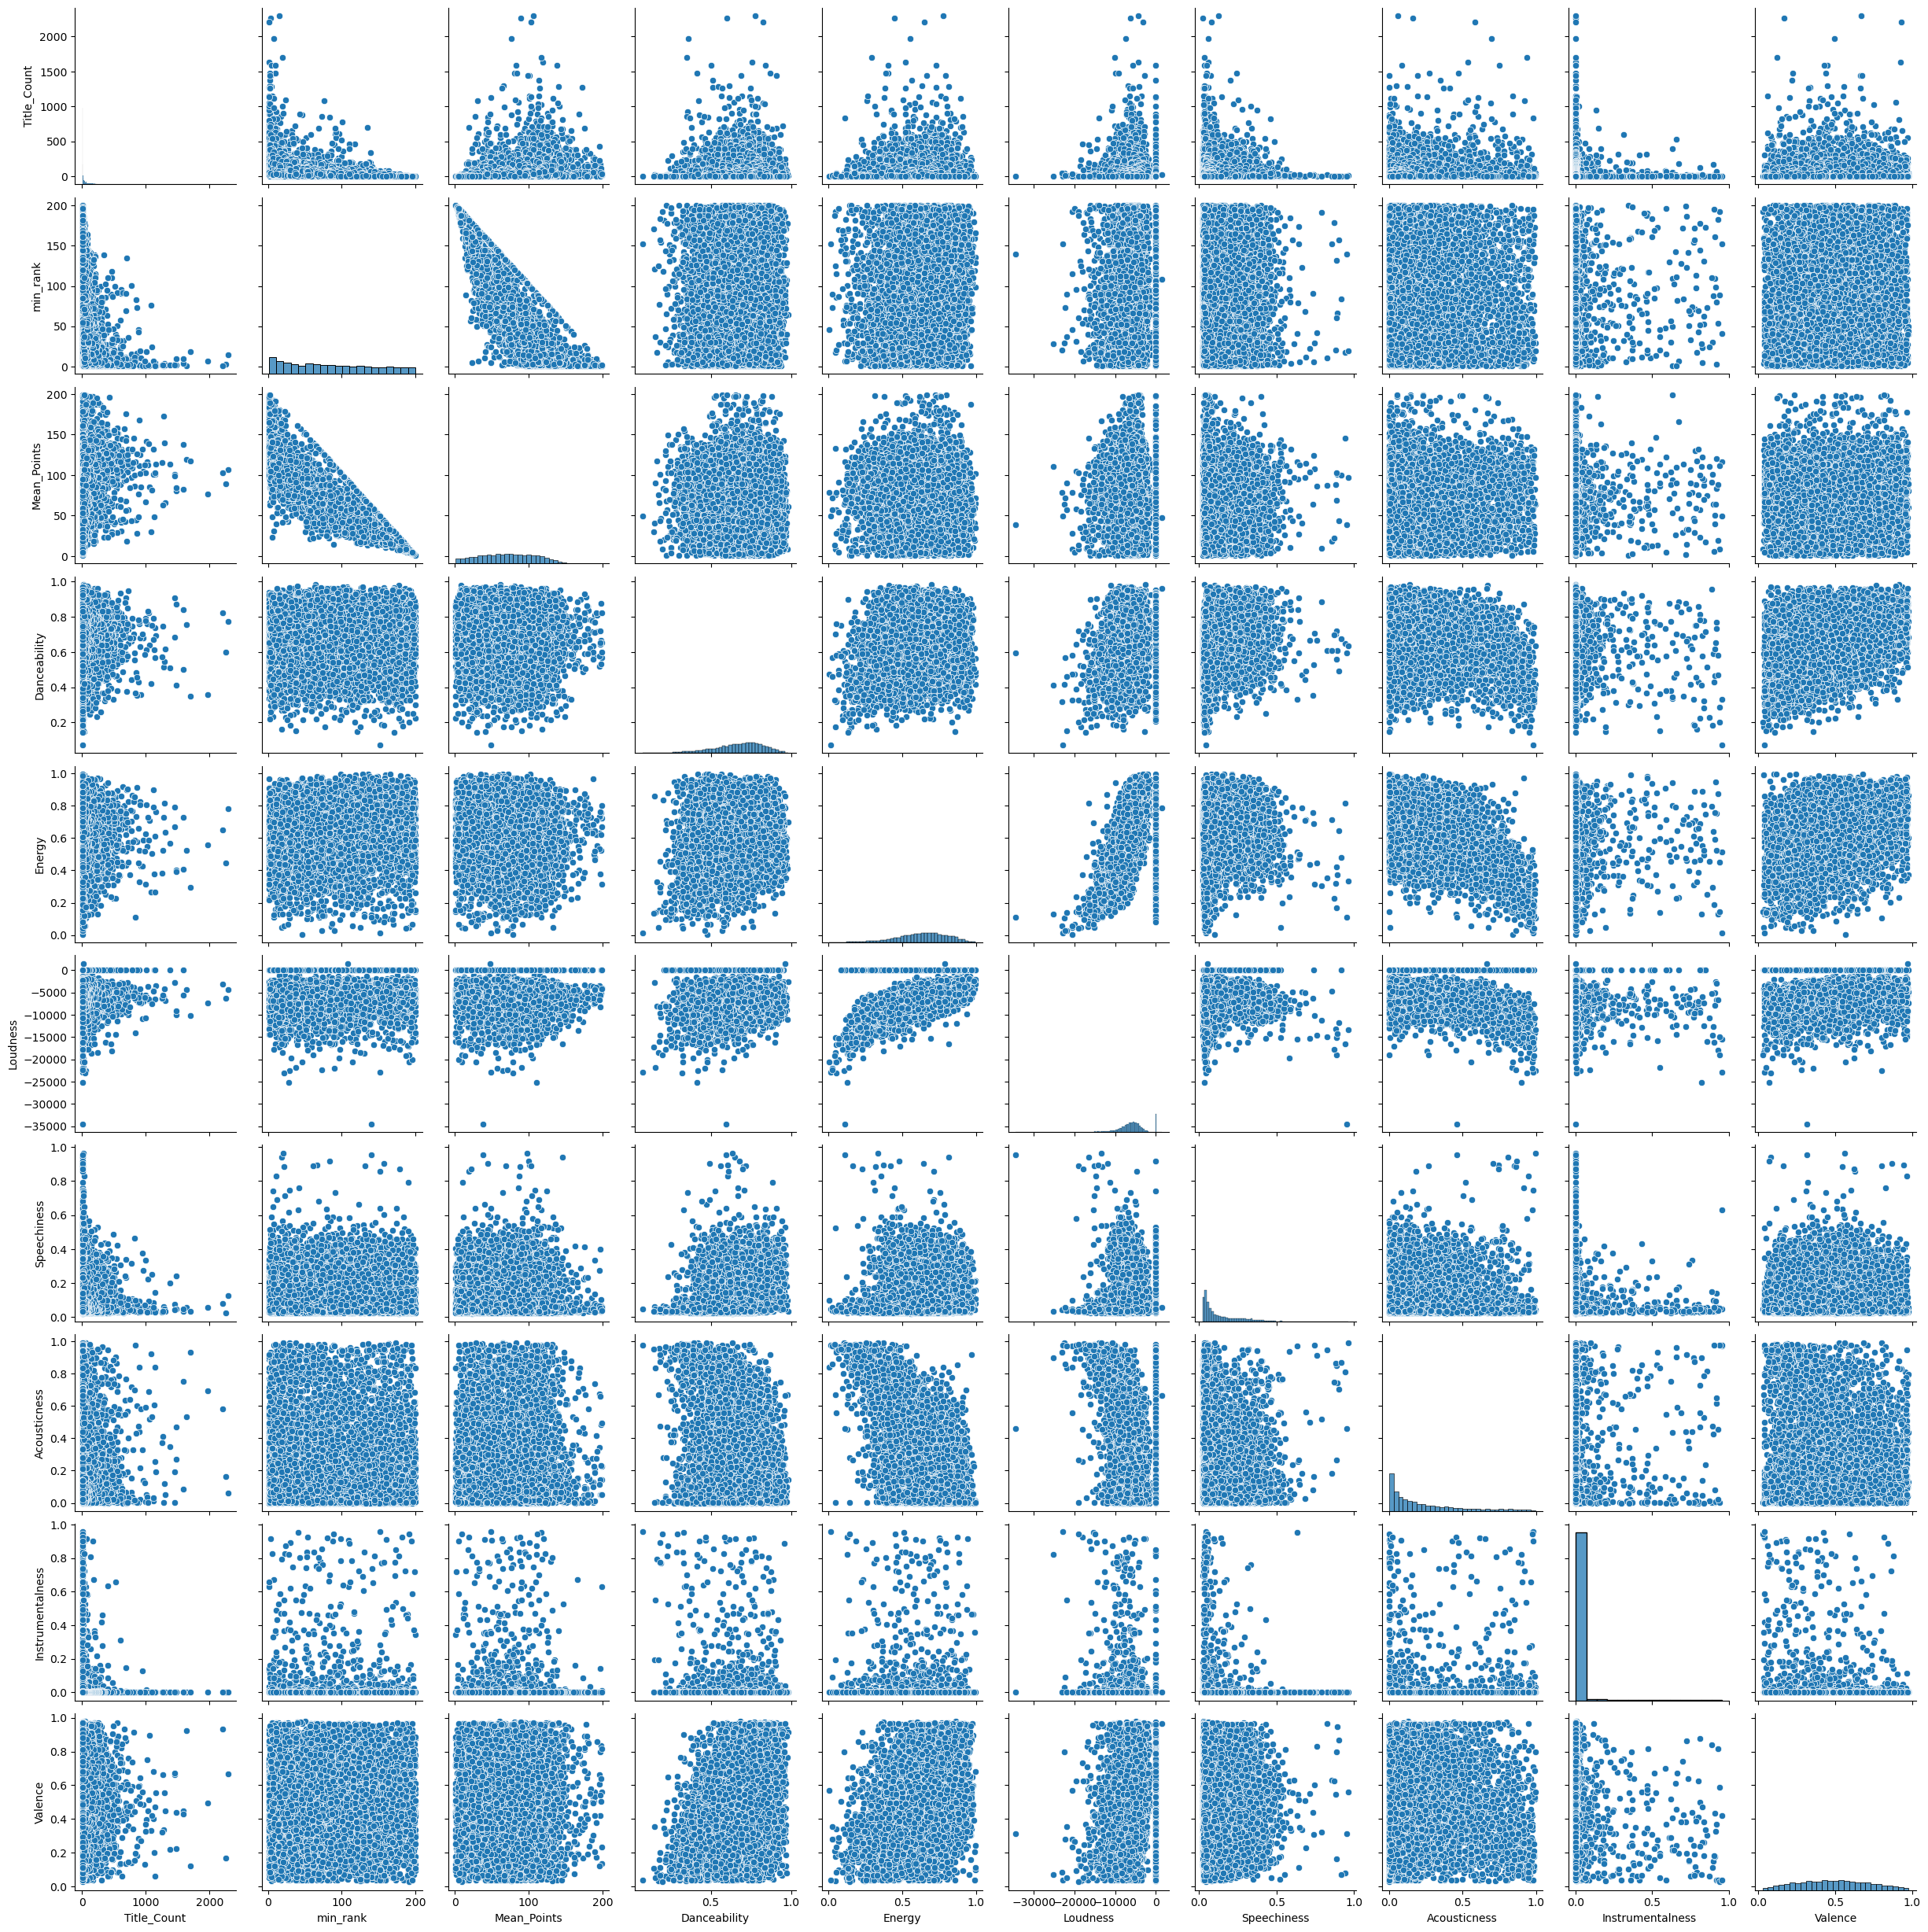

In [51]:
sns.pairplot(data=df_for_corr)

<AxesSubplot:>

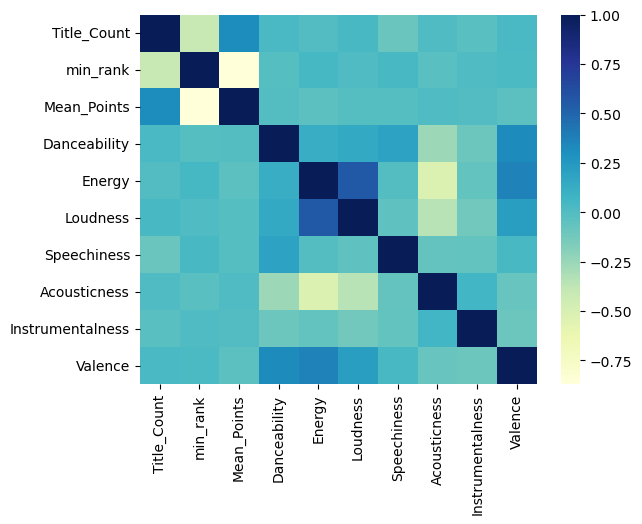

In [54]:
sns.heatmap(df_for_corr.corr(), cmap='YlGnBu')

# next part 

(array([6.815e+03, 3.790e+02, 1.060e+02, 3.000e+01, 1.800e+01, 7.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([1.0000e+00, 2.3060e+02, 4.6020e+02, 6.8980e+02, 9.1940e+02,
        1.1490e+03, 1.3786e+03, 1.6082e+03, 1.8378e+03, 2.0674e+03,
        2.2970e+03]),
 <BarContainer object of 10 artists>)

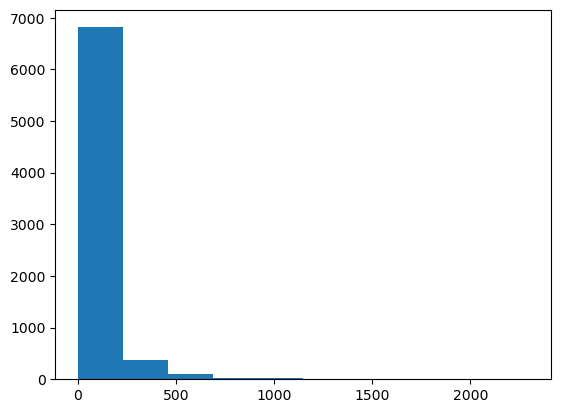

In [95]:
plt.hist(filtered_df['Title_Count'])

(array([714., 553., 463., 403., 348., 455., 411., 383., 382., 340., 324.,
        306., 340., 305., 272., 275., 312., 262., 257., 262.]),
 array([  1.  ,  10.95,  20.9 ,  30.85,  40.8 ,  50.75,  60.7 ,  70.65,
         80.6 ,  90.55, 100.5 , 110.45, 120.4 , 130.35, 140.3 , 150.25,
        160.2 , 170.15, 180.1 , 190.05, 200.  ]),
 <BarContainer object of 20 artists>)

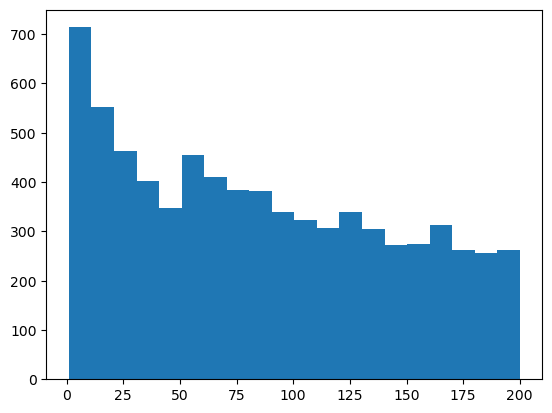

In [61]:
plt.hist(filtered_df['min_rank'], bins = 20)

In [ ]:
# create a vairable to see if a song has reached global top 20 as a measure of total popularity. 

In [86]:
filtered_df

Title  Title_Count  min_rank  Mean_Points  \
0                   Ella Baila Sola           74         1   197.621622   
2                    WHERE SHE GOES           11         1   198.909091   
3                   La Bebe - Remix           73         2   189.123288   
5                 Cupid - Twin Ver.           78         3   172.653846   
6                         un x100to           43         1   199.046512   
...                             ...          ...       ...          ...   
651017  Love$ick (feat. A$AP Rocky)            3       181    18.333333   
651258        Kill Em With Kindness            2       197     3.500000   
651483            Hasta el Amanecer            2       155    27.500000   
651547                     My House            2       161    23.500000   
651626                        Sugar            1       196     5.000000   

        Danceability  Energy  Loudness  Speechiness  Acousticness  \
0              0.668   0.758   -5176.0        0.033         0.483   
2              0.652   0.800   -4019.0        0.061         0.143   
3              0.812   0.479   -5678.0        0.333         0.213   
5              0.783   0.592   -8332.0        0.033         0.435   
6              0.569   0.724   -4076.0        0.047         0.228   
...              ...     ...       ...          ...           ...   
651017         0.672   0.764   -5109.0        0.142         0.141   
651258         0.757   0.884   -5488.0        0.040         0.008   
651483         0.832   0.608   -6042.0        0.039         0.282   
651547         0.688   0.702   -4792.0        0.050         0.022   
651626         0.748   0.788   -7055.0        0.033         0.059   

        Instrumentalness  Valence  top_20  
0                  0.000    0.834    True  
2                  0.629    0.234    True  
3                  0.000    0.559    True  
5                  0.000    0.726    True  
6                  0.000    0.562    True  
...                  ...      ...     ...  
651017             0.004    0.763   False  
651258             0.000    0.398   False  
651483             0.000    0.589   False  
651547             0.000    0.740   False  
651626             0.000    0.884   False  

[7367 rows x 12 columns]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

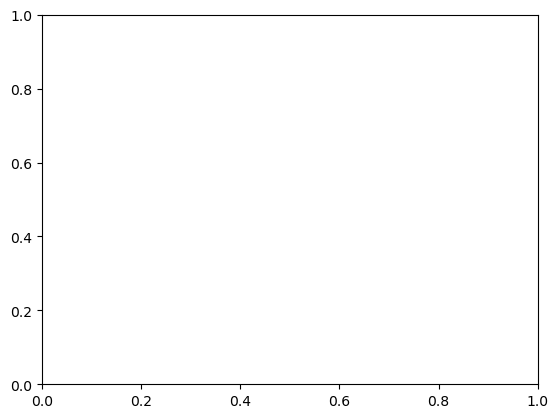

In [119]:
plt.hist(filtered_df[['top_20']])

In [90]:
characteristics

['Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Valence']

In [93]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [101]:
# svm for classifying a song into true, false for top_20 based off of song characteristics
y = filtered_df['top_20'].values
X = filtered_df[characteristics]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier (linear kernel)
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1231
        True       0.00      0.00      0.00       243

    accuracy                           0.84      1474
   macro avg       0.42      0.50      0.46      1474
weighted avg       0.70      0.84      0.76      1474

Confusion Matrix:
[[1231    0]
 [ 243    0]]


C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# non linear svm
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1231
        True       0.00      0.00      0.00       243

    accuracy                           0.84      1474
   macro avg       0.42      0.50      0.46      1474
weighted avg       0.70      0.84      0.76      1474

Confusion Matrix:
[[1231    0]
 [ 243    0]]


C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.73
              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1231
        True       0.17      0.16      0.17       243

    accuracy                           0.73      1474
   macro avg       0.50      0.50      0.50      1474
weighted avg       0.73      0.73      0.73      1474

Confusion Matrix:
[[1040  191]
 [ 203   40]]


In [105]:
X.columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Valence'],
      dtype='object')

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

In [109]:
# Create a Sequential model
model = Sequential()

# Convolutional layer
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(7, 1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
______________________________________________________

In [110]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [111]:
model.fit(X_train_val, y_train_val, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
148/148 [==============================] - 2s 6ms/step - loss: 0.4857 - accuracy: 0.8167 - val_loss: 0.4788 - val_accuracy: 0.8159
Epoch 2/10
148/148 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8288 - val_loss: 0.4838 - val_accuracy: 0.8159
Epoch 3/10
148/148 [==============================] - 0s 3ms/step - loss: 0.4588 - accuracy: 0.8288 - val_loss: 0.4779 - val_accuracy: 0.8159
Epoch 4/10
148/148 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8288 - val_loss: 0.4777 - val_accuracy: 0.8159
Epoch 5/10
148/148 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8288 - val_loss: 0.4789 - val_accuracy: 0.8159
Epoch 6/10
148/148 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.8288 - val_loss: 0.4774 - val_accuracy: 0.8159
Epoch 7/10
148/148 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.8288 - val_loss: 0.4783 - val_accuracy: 0.8159
Epoch 

In [117]:
preds = model.predict(X_test)
labels = (preds > 0.5)
accuracy_score(y_test, labels)

confusion_matrix(y_test, labels)

#labels = (probas < 0.5).astype(np.int)

47/47 [==============================] - 0s 2ms/step


array([[1231,    0],
       [ 243,    0]], dtype=int64)

In [33]:
# different targets to be explored as an estinate for sings popularity
target_mean = ['Mean_Points']
target_min_rank = ['min_rank']
target_title_count = ['Title_Count']


predictors = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

X = filtered_df[predictors]

# y_mean = filtered_df[target_mean]
# y_min = filtered_df[target_min_rank]
# y_count = filtered_df[target_title_count]


In [34]:
ys = {
    'y_mean': filtered_df[target_mean],
    'y_min': filtered_df[target_min_rank],
    'y_count': filtered_df[target_title_count]
}

In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)


In [25]:
X_scaled_df

Danceability    Energy  Loudness  Speechiness  Acousticness  \
0         0.652412  0.759839  0.814223     0.011653      0.485915   
1         0.634868  0.802220  0.846376     0.041314      0.143863   
2         0.810307  0.478305  0.800272     0.329449      0.214286   
3         0.778509  0.592331  0.726517     0.011653      0.437626   
4         0.543860  0.725530  0.844792     0.026483      0.229376   
...            ...       ...       ...          ...           ...   
7362      0.656798  0.765893  0.816085     0.127119      0.141851   
7363      0.750000  0.886983  0.805552     0.019068      0.008048   
7364      0.832237  0.608476  0.790157     0.018008      0.283702   
7365      0.674342  0.703330  0.824894     0.029661      0.022133   
7366      0.740132  0.790111  0.762005     0.011653      0.059356   

      Instrumentalness   Valence  
0             0.000000  0.848739  
1             0.657950  0.218487  
2             0.000000  0.559874  
3             0.000000  0.735294  
4             0.000000  0.563025  
...                ...       ...  
7362          0.004184  0.774160  
7363          0.000000  0.390756  
7364          0.000000  0.591387  
7365          0.000000  0.750000  
7366          0.000000  0.901261  

[7367 rows x 7 columns]

In [38]:
for y in ys:
    print(y)

y_mean
y_min
y_count


In [41]:
ys['y_min']

min_rank
0              1
2              1
3              2
5              3
6              1
...          ...
651017       181
651258       197
651483       155
651547       161
651626       196

[7367 rows x 1 columns]

In [44]:
## linear reg:
print("Linear regression results:")
for y_type in ys:
    y = ys[f'{y_type}']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"For target {y_type}: mse = {mse}, mae = {mae}, r2 = {r2}")

Linear regression results:
For target y_mean: mse = 1425.4978092355113, mae = 31.383772398168663, r2 = 0.005139429453018374
For target y_min: mse = 3320.299637111353, mae = 49.5879625276979, r2 = 0.006112000129440687
For target y_count: mse = 27739.4125502033, mae = 82.73222411600551, r2 = 0.010454721093419495


# R2 of < 0.02 the model for each of th eexplored target does not explain much of the avriance in data. 

In [20]:
# song_popularity = ['Title','Title_Count', 'min_rank', 'Mean_Points']
# characteristics = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

In [49]:
for y_type in ys:
    y = ys[f'{y_type}']
    print(y)

        Mean_Points
0        197.621622
2        198.909091
3        189.123288
5        172.653846
6        199.046512
...             ...
651017    18.333333
651258     3.500000
651483    27.500000
651547    23.500000
651626     5.000000

[7367 rows x 1 columns]
        min_rank
0              1
2              1
3              2
5              3
6              1
...          ...
651017       181
651258       197
651483       155
651547       161
651626       196

[7367 rows x 1 columns]
        Title_Count
0                74
2                11
3                73
5                78
6                43
...             ...
651017            3
651258            2
651483            2
651547            2
651626            1

[7367 rows x 1 columns]


Random Forest:
split up
fit model
fit model
fit model
fit model
fit model
fit model
fit model
fit model


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


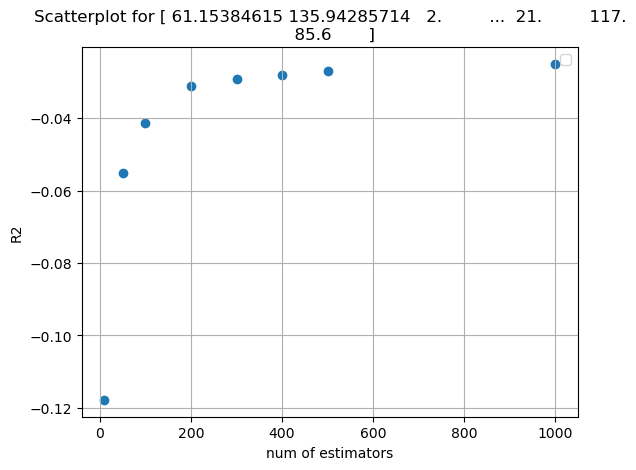

split up
fit model
fit model
fit model
fit model
fit model
fit model
fit model
fit model


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


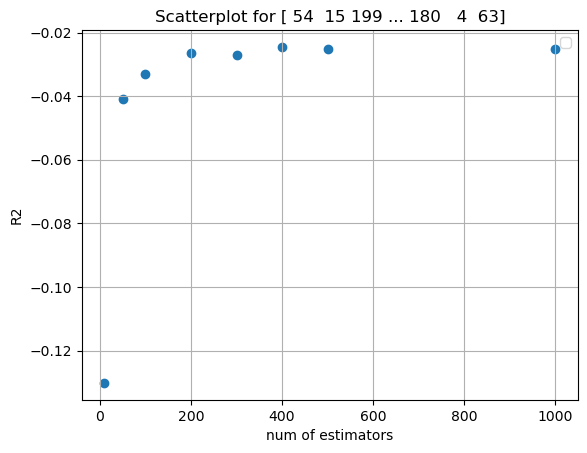

split up
fit model
fit model
fit model
fit model
fit model
fit model
fit model
fit model


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


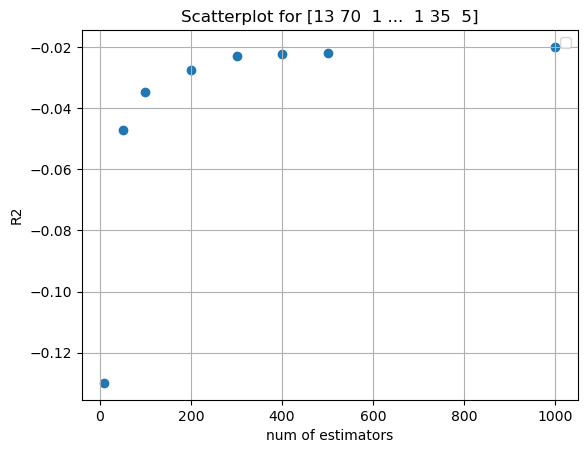

In [54]:
num_est = [10, 50, 100, 200, 300, 400, 500, 1000]

print("Random Forest:")

for y_type, y in ys.items():
    
    #  ravel() to ensure that y is a 1D array
   # y = y.ravel()
    #y = ys[f'{y_type}']
    y = y.values.ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    print('split up')
    
    r = []
    
    for num in num_est:
    
        model = RandomForestRegressor(n_estimators=num, random_state=42)
        
        model.fit(X_train, y_train)
        print('fit model')
        y_pred = model.predict(X_test)

        #mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        #mae = mean_absolute_error(y_test, y_pred)
        r.append(r2)
    
    
    plt.figure()
    plt.scatter(num_est, r)
    plt.title(f'Scatterplot for {y_test}')
    plt.xlabel('num of estimators')
    plt.ylabel('R2')
    plt.legend()
    plt.grid()
    plt.show()

# classifiers for whether a song has reached top 20

In [88]:

predictors = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']

X = filtered_df[predictors]
y = filtered_df['top_20']

0          True
2          True
3          True
5          True
6          True
          ...  
651017    False
651258    False
651483    False
651547    False
651626    False
Name: top_20, Length: 7367, dtype: bool

In [64]:
df_one_song.columns

Index(['Rank', 'Title', 'Artists', 'Date', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Valence', '# of Artist', 'Artist (Ind.)', '# of Nationality',
       'Nationality', 'Continent', 'Points (Total)',
       'Points (Ind for each Artist/Nat)', 'id', 'Song URL', 'min_rank'],
      dtype='object')

In [63]:
# believer - most common in the charts, occurs the most amount of times
# explore its trends overtime (the points it gets)

# plot total points overtime

C:\Users\1juli\anaconda3\envs\pdiot\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


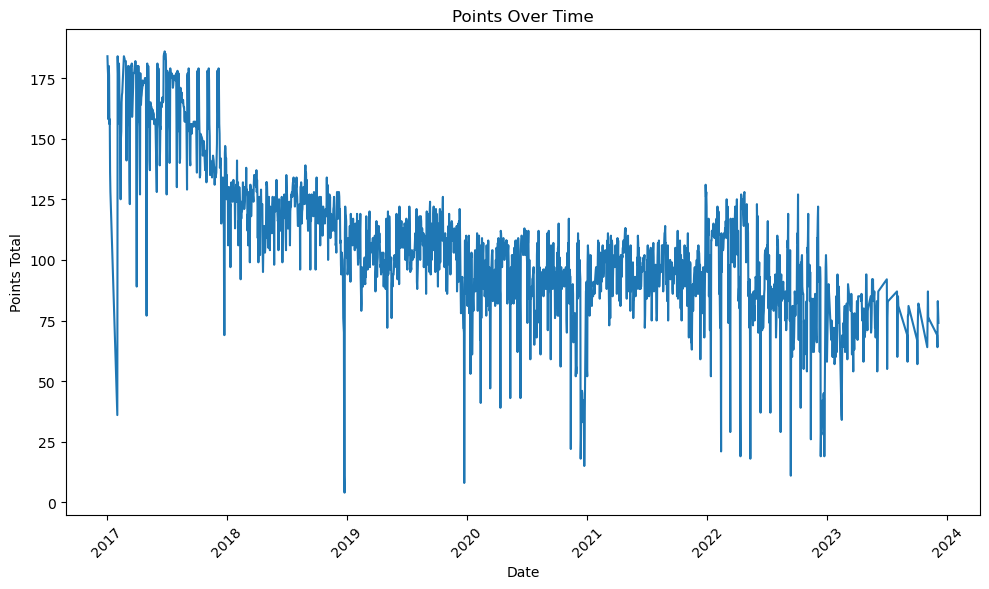

In [68]:
top_song = df_one_song[df_one_song['Title'] == 'Believer']
top_song['Date'] = pd.to_datetime(top_song['Date'])

top_song = top_song.sort_values(by='Date')

#plot the points over time
plt.figure(figsize=(10, 6)) 
plt.plot(top_song['Date'], top_song['Points (Total)'])
plt.xlabel('Date')
plt.ylabel('Points Total')
plt.title('Points Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


### drops right before the next year --> christams music becomming more popoular??


In [ ]:
# zoom in per year

top_song['year'] = top_song['date'].dt.year
top_song['day_of_year'] = top_song['date'].dt.dayofyear

daily_points = top_song.groupby(['year', 'day_of_year'])['Points (Total)'].sum()


In [70]:
# Extract the year and month from the 'date' column
top_song['year'] = top_song['Date'].dt.year
top_song['month'] = top_song['Date'].dt.month

monthly_avg = top_song.groupby(['year', 'month'])['Points (Total)'].mean()

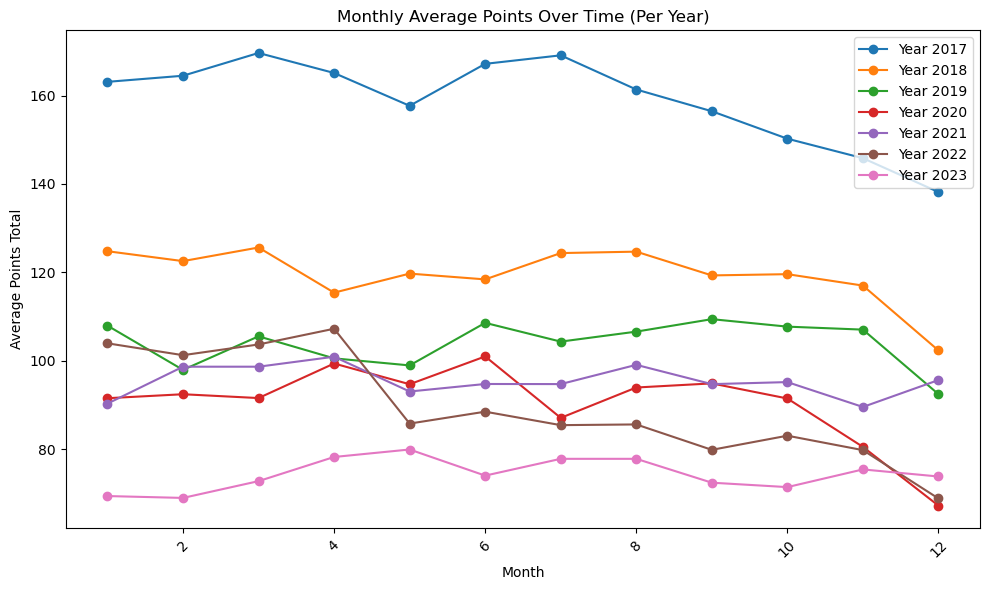

In [71]:
plt.figure(figsize=(10, 6))  
for year in top_song['year'].unique():
    year_data = monthly_avg[year]
    plt.plot(year_data.index, year_data, marker='o', linestyle='-', label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Average Points Total')
plt.title('Monthly Average Points Over Time (Per Year)')
plt.xticks(rotation=45) 
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

I mean if you really want to look at it you can. it was just me doing some exploration, but havent cleaned it up yet so dont ask me any questions based off that section 

In [192]:
cols_to_keep = ['Title','Title_Count', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentallness', 'Valence', 'Rank_mean']
filtered_df.drop('Date')

Rank                                Title                     Artists  \
0        1                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
1        2                       WHERE SHE GOES                   Bad Bunny   
2        3                      La Bebe - Remix       Yng Lvcas, Peso Pluma   
3        4                    Cupid - Twin Ver.                 FIFTY FIFTY   
4        5                            un x100to   Grupo Frontera, Bad Bunny   
...    ...                                  ...                         ...   
7435   184                                 Bobo                    J Balvin   
7436   185              Stay (feat. Maty Noyes)                        Kygo   
7437   187  Purple Lamborghini (with Rick Ross)                    Skrillex   
7438   192                         Paper Planes                      M.I.A.   
7439   200                      Ni**as In Paris           JAY-Z, Kanye West   

           Date  Danceability  Energy  Loudness  Speechiness  Acousticness  \
0    2023-05-29         0.668   0.758   -5176.0        0.033         0.483   
1    2023-05-29         0.652   0.800   -4019.0        0.061         0.143   
2    2023-05-29         0.812   0.479   -5678.0        0.333         0.213   
3    2023-05-29         0.783   0.592   -8332.0        0.033         0.435   
4    2023-05-29         0.569   0.724   -4076.0        0.047         0.228   
...         ...           ...     ...       ...          ...           ...   
7435 2017-01-01         0.729   0.888   -2864.0        0.122         0.117   
7436 2017-01-01         0.648   0.736   -7948.0        0.039         0.044   
7437 2017-01-01         0.457   0.899   -2591.0        0.132         0.002   
7438 2017-01-01         0.447   0.848   -6175.0        0.222         0.033   
7439 2017-01-01         0.757   0.882   -6125.0        0.248         0.076   

      Instrumentalness  ...  # of Artist   Artist (Ind.) # of Nationality  \
0                0.000  ...     Artist 1  Eslabon Armado    Nationality 1   
1                0.629  ...     Artist 1       Bad Bunny    Nationality 1   
2                0.000  ...     Artist 1       Yng Lvcas    Nationality 1   
3                0.000  ...     Artist 1     FIFTY FIFTY    Nationality 1   
4                0.000  ...     Artist 1  Grupo Frontera    Nationality 1   
...                ...  ...          ...             ...              ...   
7435             0.000  ...     Artist 1        J Balvin    Nationality 1   
7436             0.000  ...     Artist 1            Kygo    Nationality 1   
7437             0.000  ...     Artist 1        Skrillex    Nationality 1   
7438             0.000  ...     Artist 1          M.I.A.    Nationality 1   
7439             0.000  ...     Artist 1           JAY-Z    Nationality 1   

         Nationality      Continent Points (Total)  \
0             Mexico  Latin-America            200   
1        Puerto Rico  Latin-America            199   
2             Mexico  Latin-America            198   
3        South Korea           Asia            197   
4             Mexico  Latin-America            196   
...              ...            ...            ...   
7435        Colombia  Latin-America             17   
7436          Norway         Europe             16   
7437   United States  Anglo-America             14   
7438  United Kingdom         Europe              9   
7439   United States  Anglo-America              1   

      Points (Ind for each Artist/Nat)                      id  \
0                                100.0  3qQbCzHBycnDpGskqOWY0E   
1                                199.0  7ro0hRteUMfnOioTFI5TG1   
2                                 99.0  2UW7JaomAMuX9pZrjVpHAU   
3                                197.0  7FbrGaHYVDmfr7KoLIZnQ7   
4                                 98.0  6pD0ufEQq0xdHSsRbg9LBK   
...                                ...                     ...   
7435                              17.0  7AtlMCIauSQZqiXSlbBPW6   
7436              

# one id corresponmds to one title, a title can have multiple ids

In [190]:
df_one_song[df_one_song['Title'] == 'Ella Baila Sola']['id'] == '3qQbCzHBycnDpGskqOWY0E'

0         True
295       True
589       True
893       True
1190      True
         ...  
20054    False
20340    False
20627    False
20910    False
21197    False
Name: id, Length: 74, dtype: bool

In [ ]:
# create a measure of overall popularity: sum of all 

In [147]:
# convert date to correct format
df_one_song['Date'] = pd.to_datetime(df_one_song['Date'], format='%d/%m/%Y')

In [149]:
characteristics = ['Danceability','Energy','Loudness','Speechiness','Acousticness','Instrumentalness','Valence']

In [154]:
# trends overtime
#df['year'] = df['Date'].dt.year

# characteristics.append('year')
# filtered_df = df[characteristics]
# # Reset the index to make 'year' a regular column
# filtered_df.reset_index(inplace=True)

year_avg = df_one_song.groupby(df_one_song['Date'].dt.year)[characteristics].mean()

#.sort_values(by='year').reset_index()

year_avg

Danceability    Energy     Loudness  Speechiness  Acousticness  \
Date                                                                   
2017      0.693776  0.657458 -5325.612878     0.112219      0.186971   
2018      0.702416  0.645327 -5438.684005     0.113882      0.207727   
2019      0.702262  0.622549 -5615.631696     0.121750      0.256852   
2020      0.702249  0.614668 -5668.026186     0.118151      0.261844   
2021      0.676993  0.630509 -5580.692651     0.098302      0.266904   
2022      0.663265  0.649506 -5485.403899     0.092804      0.244237   
2023      0.665473  0.640972 -5416.940267     0.086245      0.255177   

      Instrumentalness   Valence  
Date                              
2017          0.006245  0.506113  
2018          0.004233  0.483259  
2019          0.010356  0.498734  
2020          0.008674  0.517401  
2021          0.008950  0.524966  
2022          0.011938  0.499800  
2023          0.017155  0.501543

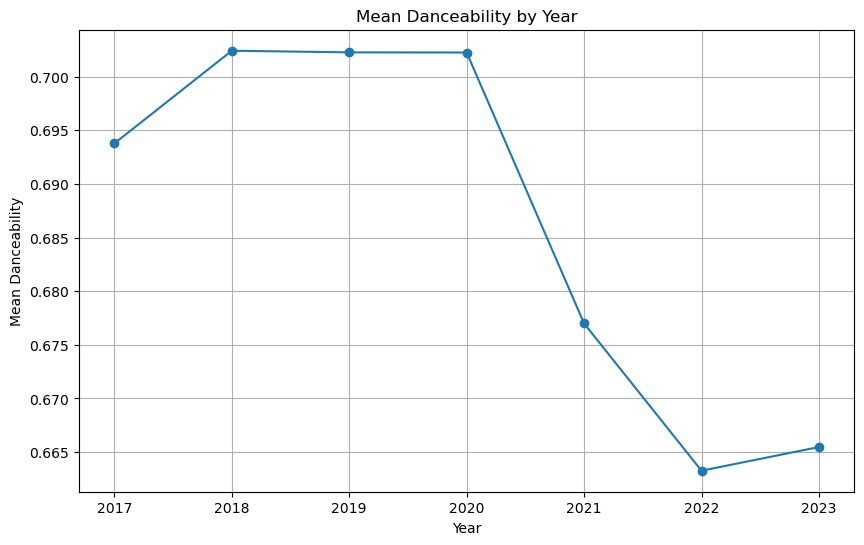

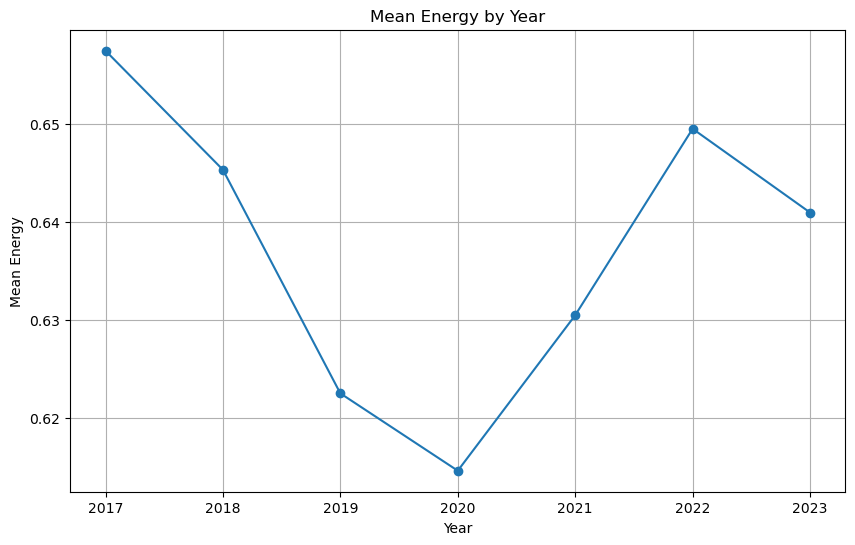

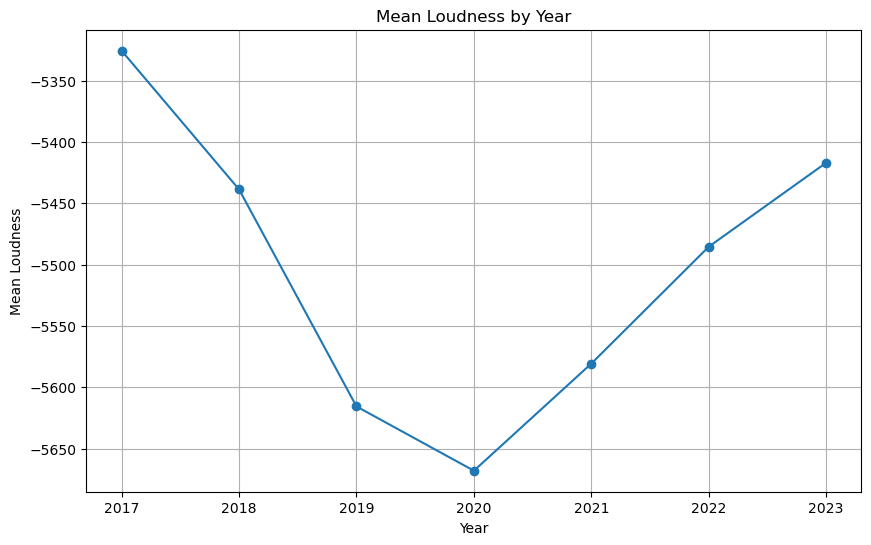

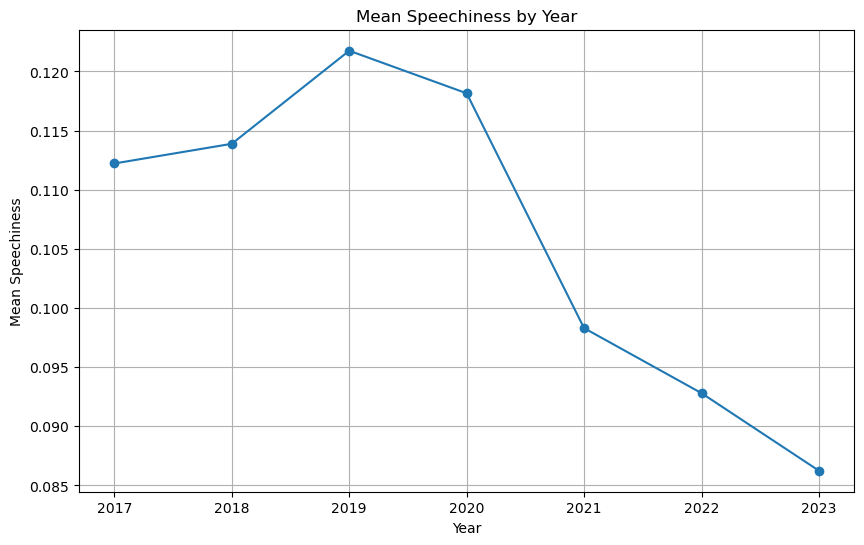

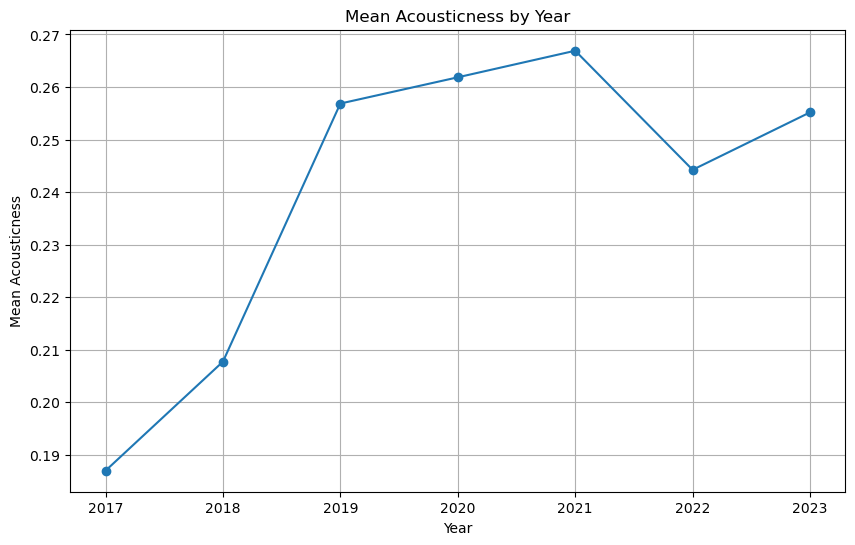

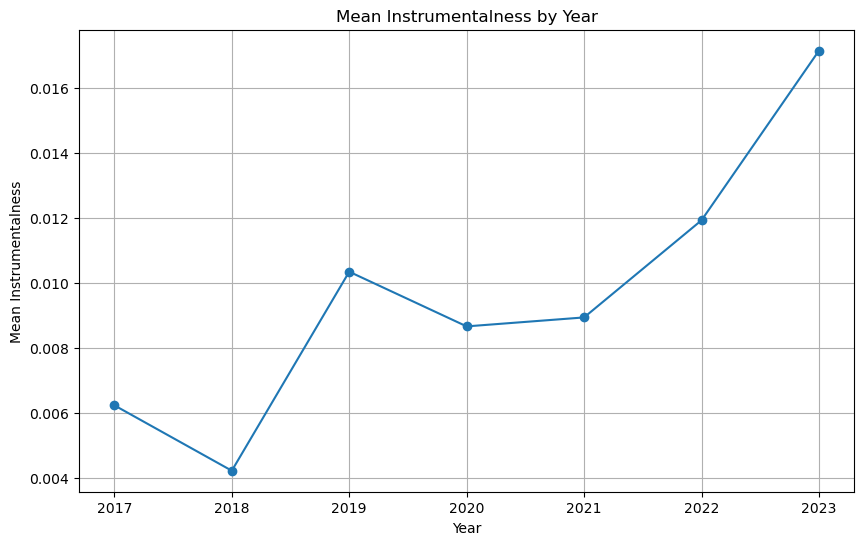

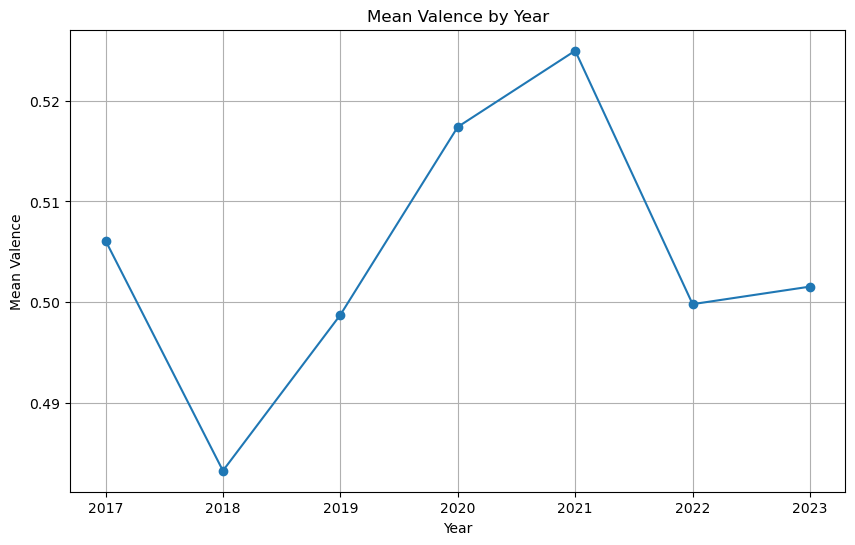

In [155]:
# Create a plot for each characteristic
for characteristic in characteristics:
    plt.figure(figsize=(10, 6))
    plt.plot(year_avg.index, year_avg[characteristic], marker='o', linestyle='-')
    plt.title(f'Mean {characteristic} by Year')
    plt.xlabel('Year')
    plt.ylabel(f'Mean {characteristic}')
    plt.grid(True)
    plt.show()

In [156]:
df_one_song.head()

Rank              Title                     Artists       Date  \
0     1    Ella Baila Sola  Eslabon Armado, Peso Pluma 2023-05-29   
2     2     WHERE SHE GOES                   Bad Bunny 2023-05-29   
3     3    La Bebe - Remix       Yng Lvcas, Peso Pluma 2023-05-29   
5     4  Cupid - Twin Ver.                 FIFTY FIFTY 2023-05-29   
6     5          un x100to   Grupo Frontera, Bad Bunny 2023-05-29   

   Danceability  Energy  Loudness  Speechiness  Acousticness  \
0         0.668   0.758   -5176.0        0.033         0.483   
2         0.652   0.800   -4019.0        0.061         0.143   
3         0.812   0.479   -5678.0        0.333         0.213   
5         0.783   0.592   -8332.0        0.033         0.435   
6         0.569   0.724   -4076.0        0.047         0.228   

   Instrumentalness  Valence # of Artist   Artist (Ind.) # of Nationality  \
0             0.000    0.834    Artist 1  Eslabon Armado    Nationality 1   
2             0.629    0.234    Artist 1       Bad Bunny    Nationality 1   
3             0.000    0.559    Artist 1       Yng Lvcas    Nationality 1   
5             0.000    0.726    Artist 1     FIFTY FIFTY    Nationality 1   
6             0.000    0.562    Artist 1  Grupo Frontera    Nationality 1   

   Nationality      Continent  Points (Total)  \
0       Mexico  Latin-America             200   
2  Puerto Rico  Latin-America             199   
3       Mexico  Latin-America             198   
5  South Korea           Asia             197   
6       Mexico  Latin-America             196   

   Points (Ind for each Artist/Nat)                      id  \
0                             100.0  3qQbCzHBycnDpGskqOWY0E   
2                             199.0  7ro0hRteUMfnOioTFI5TG1   
3                              99.0  2UW7JaomAMuX9pZrjVpHAU   
5                             197.0  7FbrGaHYVDmfr7KoLIZnQ7   
6                              98.0  6pD0ufEQq0xdHSsRbg9LBK   

                                            Song URL  
0  https://open.spotify.com/track/3qQbCzHBycnDpGs...  
2  https://open.spotify.com/track/7ro0hRteUMfnOio...  
3  https://open.spotify.com/track/2UW7JaomAMuX9pZ...  
5  https://open.spotify.com/track/7FbrGaHYVDmfr7K...  
6  https://open.spotify.com/track/6pD0ufEQq0xdHSs...

In [157]:
X = df_one_song[characteristics]

In [158]:
X

Danceability  Energy  Loudness  Speechiness  Acousticness  \
0              0.668   0.758   -5176.0        0.033         0.483   
2              0.652   0.800   -4019.0        0.061         0.143   
3              0.812   0.479   -5678.0        0.333         0.213   
5              0.783   0.592   -8332.0        0.033         0.435   
6              0.569   0.724   -4076.0        0.047         0.228   
...              ...     ...       ...          ...           ...   
651930         0.675   0.562   -7678.0        0.035         0.233   
651931         0.273   0.794   -6644.0        0.068         0.022   
651932         0.650   0.658  -10908.0        0.085         0.089   
651933         0.665   0.771   -5779.0        0.053         0.016   
651934         0.757   0.882   -6125.0        0.248         0.076   

        Instrumentalness  Valence  
0                  0.000    0.834  
2                  0.629    0.234  
3                  0.000    0.559  
5                  0.000    0.726  
6                  0.000    0.562  
...                  ...      ...  
651930             0.000    0.309  
651931             0.000    0.377  
651932             0.004    0.883  
651933             0.000    0.764  
651934             0.000    0.684  

[467061 rows x 7 columns]

In [184]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df['points'] = df_one_song['Points (Total)']

In [185]:
X_scaled_df

Danceability    Energy  Loudness  Speechiness  Acousticness  \
0           0.652412  0.759839  0.814223     0.011653      0.485915   
1           0.634868  0.802220  0.846376     0.041314      0.143863   
2           0.810307  0.478305  0.800272     0.329449      0.214286   
3           0.778509  0.592331  0.726517     0.011653      0.437626   
4           0.543860  0.725530  0.844792     0.026483      0.229376   
...              ...       ...       ...          ...           ...   
467056      0.660088  0.562059  0.744692     0.013771      0.234406   
467057      0.219298  0.796165  0.773427     0.048729      0.022133   
467058      0.632675  0.658930  0.654930     0.066737      0.089537   
467059      0.649123  0.772957  0.797466     0.032839      0.016097   
467060      0.750000  0.884965  0.787850     0.239407      0.076459   

        Instrumentalness   Valence  points  
0               0.000000  0.845188   200.0  
1               0.657950  0.217573     NaN  
2               0.000000  0.557531   199.0  
3               0.000000  0.732218   198.0  
4               0.000000  0.560669     NaN  
...                  ...       ...     ...  
467056          0.000000  0.296025    20.0  
467057          0.000000  0.367155   125.0  
467058          0.004184  0.896444   100.0  
467059          0.000000  0.771967    91.0  
467060          0.000000  0.688285     NaN  

[467061 rows x 8 columns]

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [161]:
X_scaled# Create a list to store the silhouette scores for different k values
silhouette_scores = []

# # Define a range of k values (number of clusters) to try
# k_values = range(2, 11)  # You can adjust this range

# # Run k-means clustering for different values of k
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     cluster_labels = kmeans.fit_predict(X_scaled)
#     silhouette_avg = silhouette_score(X_scaled, cluster_labels)
#     silhouette_scores.append(silhouette_avg)
    
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,30): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_)


C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [73]:
wcss

[113785.42552357212,
 82293.43478497273,
 60890.76160416107,
 53475.10986242011,
 48902.20456840055,
 45188.594652473475,
 42281.62945661159,
 40543.3639994162,
 38906.15670772161,
 37426.45894963911]

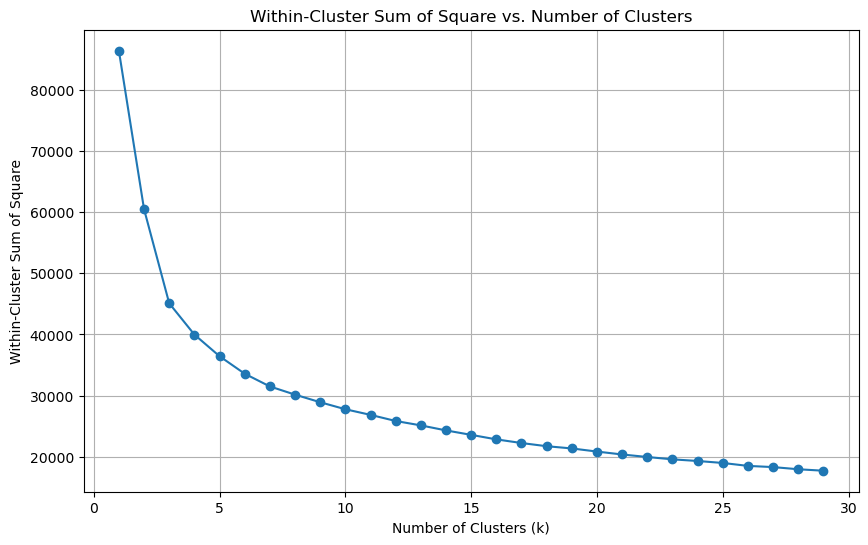

In [162]:

# Plot the silhouette scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(list(range(1,30)),wcss, marker='o')
plt.title("Within-Cluster Sum of Square vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Square")
plt.grid(True)
plt.show()

In [164]:
X_scaled.shape

(467061, 7)

# try PCA to see if there are more interpretable clusers 

In [165]:
from sklearn.decomposition import PCA
import numpy as np

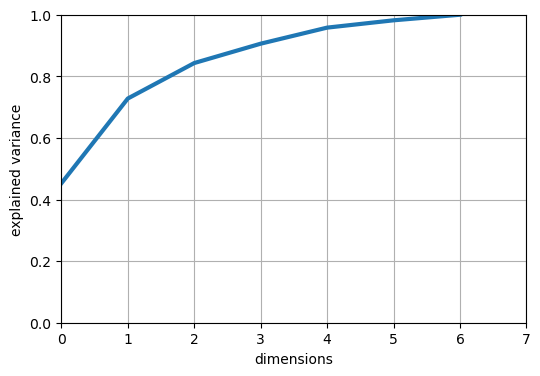

In [166]:
#pca=PCA(n_components=0.95)
#X_reduces = pca.fit_transform(X_scaled)



# Perform PCA without reducing dimensionality
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance vs number of dimensions

plt.figure(figsize = (6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 7, 0, 1]) 
plt.xlabel("dimensions")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()


In [167]:
# see the amount of explained variance kept with n=4
pca = PCA(n_components=4)

# Fit the PCA model to your data
pca.fit(X_scaled)  # Replace X with your data
X_pca_4 = pca.transform(X_scaled)

# Get the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = sum(explained_variance)


In [120]:
# see the amount of explained variance kept with n=4
pca = PCA(n_components=1)

# Fit the PCA model to your data
pca.fit(X_scaled)  # Replace X with your data
X_pca_1 = pca.transform(X_scaled)

# Get the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance
total_explained_variance = sum(explained_variance)

In [168]:
total_explained_variance

0.9059798508216246

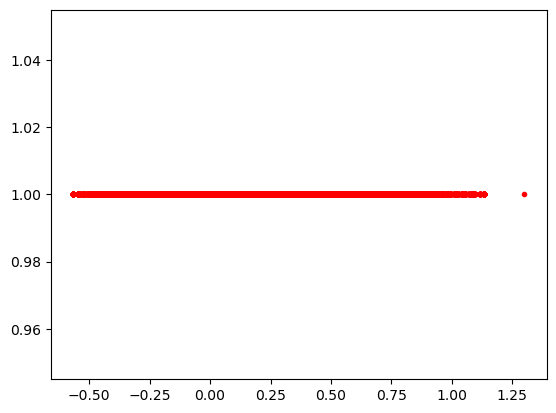

In [128]:
plt.plot(X_pca_1, [1] * len(X_pca_1), 'ro', markersize=3) 

In [118]:
X_pca_2[:,0]

array([-0.0861712 , -0.0861712 ,  0.0962166 , ..., -0.32375605,
       -0.31103832, -0.31103832])

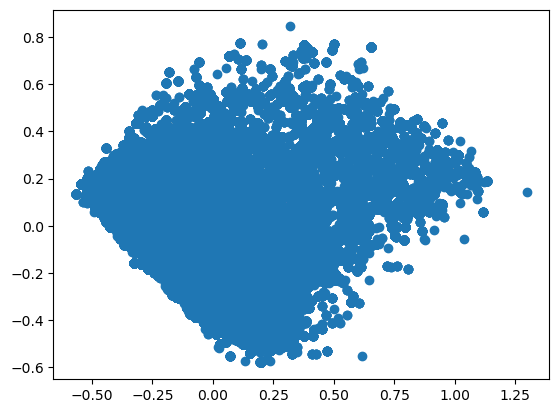

In [119]:
plt.scatter(X_pca_2[:,0], X_pca_2[:,1])

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit
import numpy as np

In [102]:
X_pca_4

array([[-0.0861712 ,  0.38949647,  0.16282499,  0.0172324 ],
       [-0.0861712 ,  0.38949647,  0.16282499,  0.0172324 ],
       [ 0.0962166 , -0.29925201,  0.08909223,  0.12734831],
       ...,
       [-0.32375605,  0.00621379,  0.10099509, -0.11540289],
       [-0.31103832, -0.00640529,  0.01757117,  0.1080896 ],
       [-0.31103832, -0.00640529,  0.01757117,  0.1080896 ]])

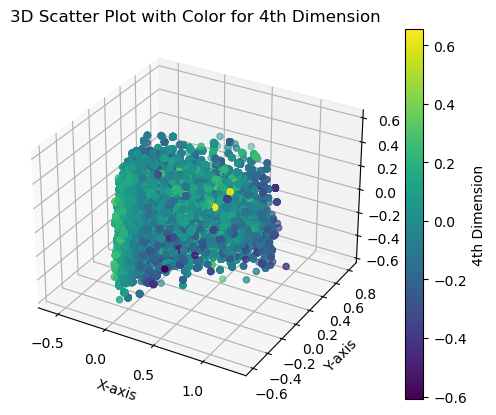

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_4[:, 0], X_pca_4[:,1], X_pca_4[:,2], c=X_pca_4[:,3], cmap='viridis')

# Add a color bar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label('4th Dimension')

# Label the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.title('3D Scatter Plot with Color for 4th Dimension')
plt.show()

C:\Users\1juli\AppData\Local\Temp\ipykernel_33416\1073509347.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(X_pca_3[:, 0], X_pca_3[:,1], X_pca_3[:,2],  cmap='viridis')


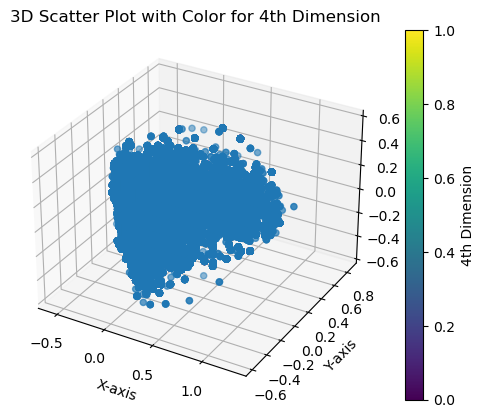

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3[:, 0], X_pca_3[:,1], X_pca_3[:,2],  cmap='viridis')

# Add a color bar to the plot
cbar = plt.colorbar(scatter)
cbar.set_label('4th Dimension')

# Label the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.title('3D Scatter Plot with Color for 4th Dimension')
plt.show()

In [170]:
# clustering fro 4-dim data

from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,30): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca_4) 
    wcss.append(kmeans.inertia_)

C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

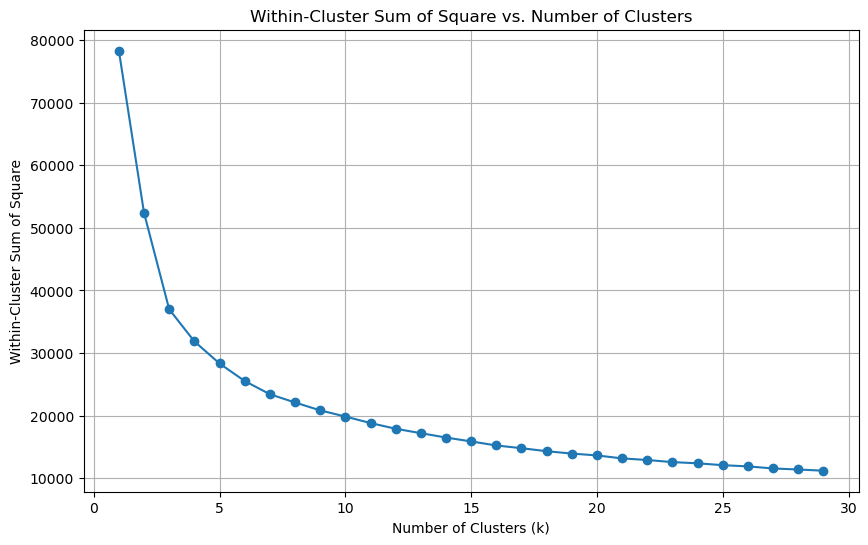

In [171]:

# Plot the silhouette scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(list(range(1,30)),wcss, marker='o')
plt.title("Within-Cluster Sum of Square vs. Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Square")
plt.grid(True)
plt.show()

In [173]:
# in accordance with the knee plot, take k = 7 --> index = 6
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
kmeans.fit(X_pca_4) 

# Get cluster labels for each data point
cluster_labels = kmeans.labels_


C:\Users\1juli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [182]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6])

In [177]:
X_scaled_df['cluster_labels'] = cluster_labels
X_scaled_df

Danceability    Energy  Loudness  Speechiness  Acousticness  \
0           0.652412  0.759839  0.814223     0.011653      0.485915   
1           0.634868  0.802220  0.846376     0.041314      0.143863   
2           0.810307  0.478305  0.800272     0.329449      0.214286   
3           0.778509  0.592331  0.726517     0.011653      0.437626   
4           0.543860  0.725530  0.844792     0.026483      0.229376   
...              ...       ...       ...          ...           ...   
467056      0.660088  0.562059  0.744692     0.013771      0.234406   
467057      0.219298  0.796165  0.773427     0.048729      0.022133   
467058      0.632675  0.658930  0.654930     0.066737      0.089537   
467059      0.649123  0.772957  0.797466     0.032839      0.016097   
467060      0.750000  0.884965  0.787850     0.239407      0.076459   

        Instrumentalness   Valence  cluster_labels  
0               0.000000  0.845188               3  
1               0.657950  0.217573               6  
2               0.000000  0.557531               2  
3               0.000000  0.732218               3  
4               0.000000  0.560669               5  
...                  ...       ...             ...  
467056          0.000000  0.296025               6  
467057          0.000000  0.367155               6  
467058          0.004184  0.896444               1  
467059          0.000000  0.771967               1  
467060          0.000000  0.688285               1  

[467061 rows x 8 columns]

In [174]:
from sklearn.model_selection import train_test_split

In [35]:
# check mapping of id to title

id_title_counts = df.groupby('id')['Title'].value_counts() 
condition = id_title_counts != 1

exceptions = df[df['id'].isin(id_title_counts[condition].index)]['Title']



In [36]:
exceptions

Series([], Name: Title, dtype: object)

In [37]:
df['Nationality'].nunique()

74